In [3]:
import matplotlib.pyplot as plt
import numpy as np

import sys

from ctapipe.io import event_source
from lstchain.calib.camera.r0 import LSTR0Corrections
from traitlets.config.loader import Config 

plt.rcParams['font.size'] = 18

# This is notebook to low level calibration R0->R1 
Fill the R1 container ```event.r1.tel[0].waveform```.

Following function exist:
1. to subtraction pedestal ```subtract_pedestal(event)```
2. to dt correction ```time_lapse_corr(event)```
3. to interpolate spikes ```interpolate_spikes(event)```

or you can call method ```calibrate(event)```

To subtraction pedestal you need pedestal file from cta-lstchain-extra or you can create pedestal file yourself using scirpt ```create_pedestal_file.py```

In ```config``` you can set how many samples in waveform keep to R1 container (first two and last two samples in waveform are noisy)  

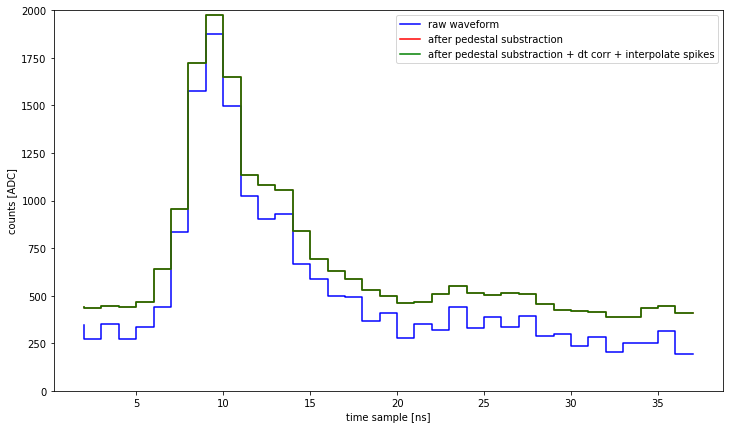

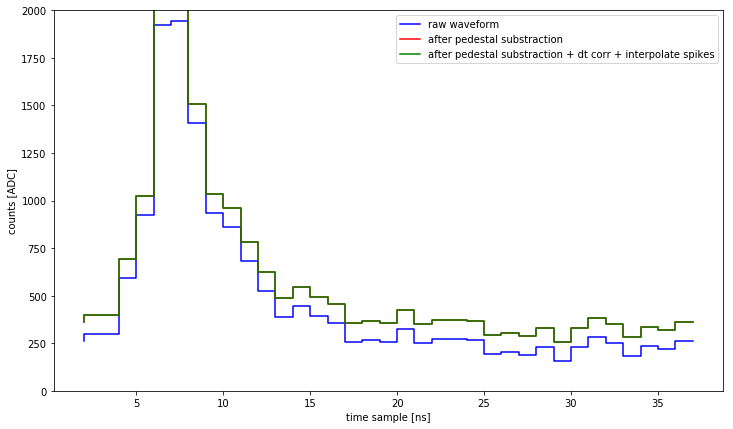

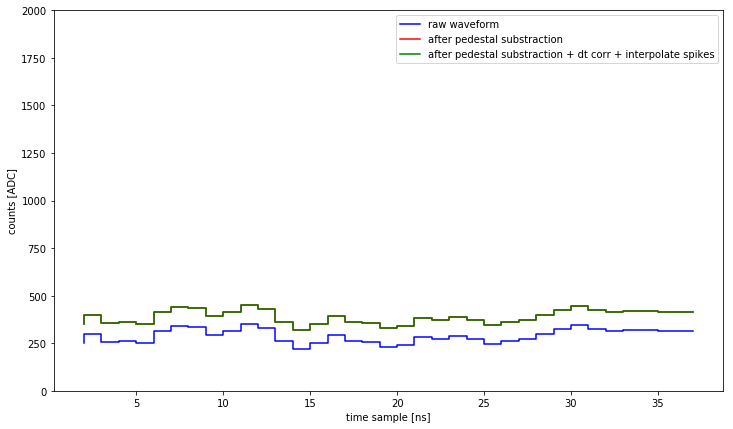

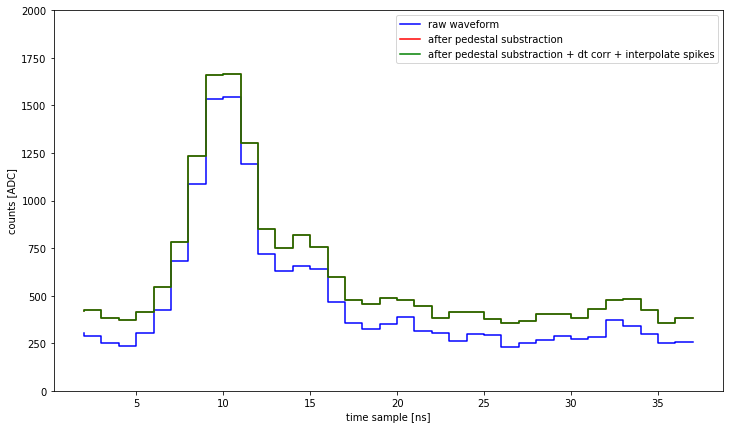

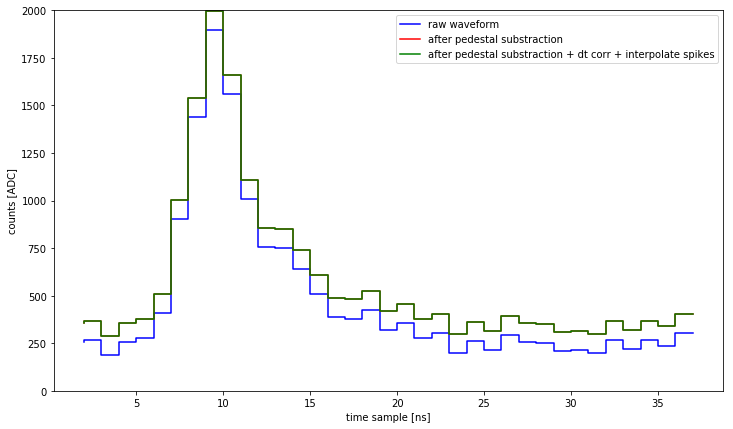

In [12]:
# Give path to real LST data
# We have to use LSTEventSource: LST-1.*.Run00xxx.xxx.fits.fz
# because for dt correction and interpolate spikes events must be in turn (event_id = 0,1,2, ...)

input_url='/ctadata/franca/LST/LST-1.1.Run00589.0000.fits.fz'
reader = event_source(input_url, max_events=5)

# Give path to pedestal file and set offset to baseline
config = Config({
    "LSTR0Corrections": {
        #"pedestal_path": "/ctadata/franca/LST/pedestal_file_run446_0000.fits",
        "pedestal_path": "/ctadata/franca/LST/pedestal_file_run585_5000.fits",
        "offset":  400,
        "tel_id": 0, # for EVB3 will be 1
        "r1_sample_start": None,
        "r1_sample_end": None
    }
})
# Give path to pedestal file
lst_r0 = LSTR0Corrections(config=config)

t = np.linspace(2, 37, 36)

for ev in reader:
    plt.figure(figsize=(12, 7))
    plt.step(t,  ev.r0.tel[0].waveform[0, 7, 2:38], color="blue", label="raw waveform")
    
    lst_r0.subtract_pedestal(ev)
    
    plt.step(t,  ev.r1.tel[0].waveform[0, 7, 2:38], color="red", label="after pedestal substraction ")
    
    lst_r0.time_lapse_corr(ev)
    lst_r0.interpolate_spikes(ev)
    
    plt.step(t,  ev.r1.tel[0].waveform[0, 7, 2:38], color="green", label="after pedestal substraction + dt corr + interpolate spikes")
    
    plt.xlabel("time sample [ns]")
    plt.ylabel("counts [ADC]")
    plt.legend()
    plt.ylim([0, 2000])
    plt.show()

# Call ```calibrate``` method

1


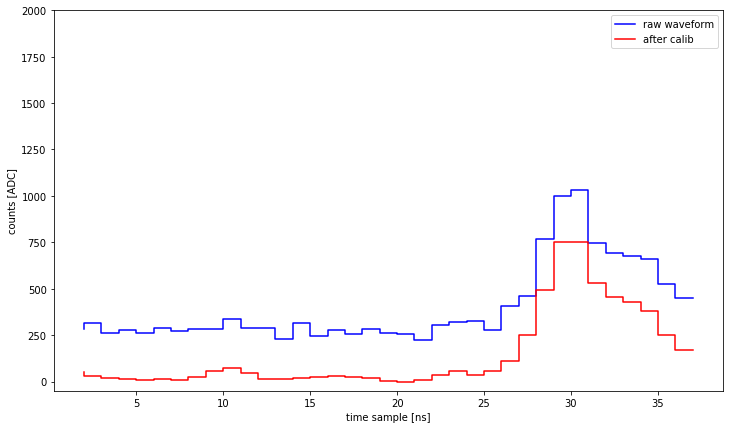

2


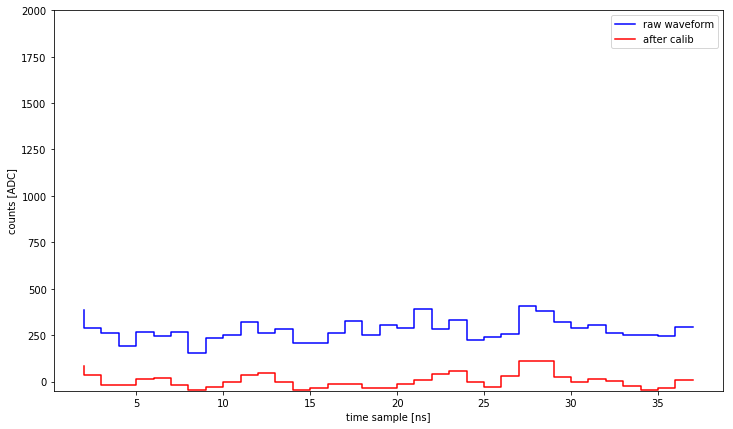

3


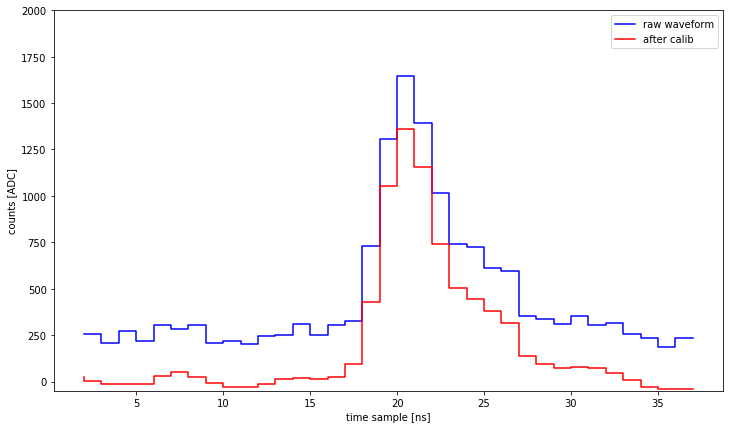

4


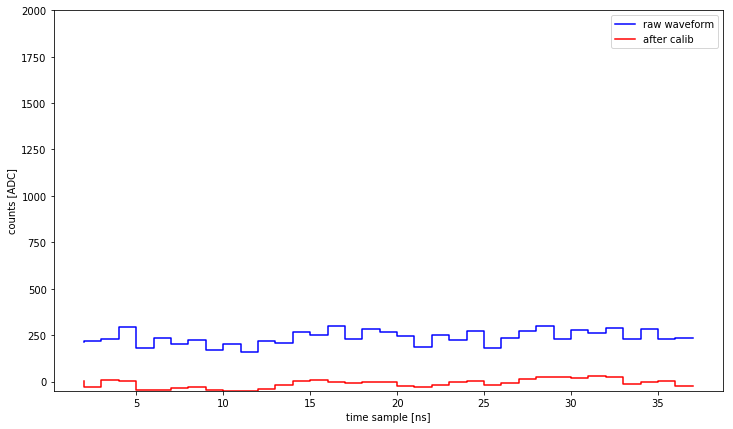

5


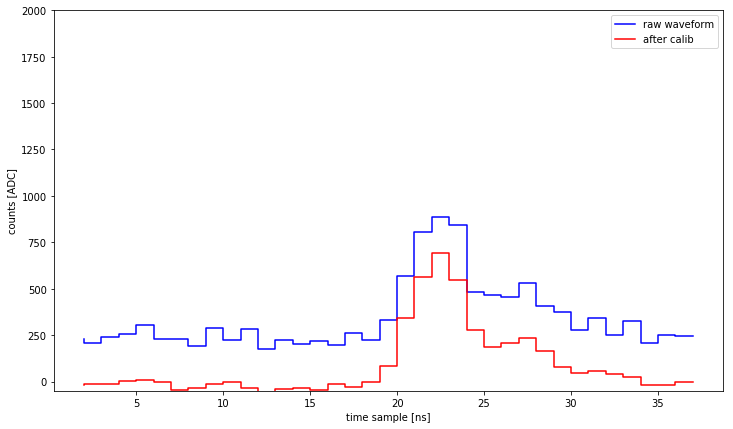

In [9]:
# Give path to real LST data
input_url='/ctadata/franca/LST/LST-1.1.Run00442.0000.fits.fz'
reader = event_source(input_url, max_events=5)

# Give path to pedestal file and set offset to baseline
config = Config({
    "LSTR0Corrections": {
        "pedestal_path": "/ctadata/franca/LST/pedestal_file_run446_0000.fits",
        "offset":  300,
        "tel_id": 0, # for EVB3 will be 1
        "r1_sample_start": 2,
        "r1_sample_end": 38
    }
})

lst_r0 = LSTR0Corrections(config=config)

t = np.linspace(2, 37, 36)

for ev in reader:
    print(ev.r0.event_id)
    plt.figure(figsize=(12, 7))
    plt.step(t,  ev.r0.tel[0].waveform[0, 7, 2:38], color="blue", label="raw waveform")
    
    lst_r0.calibrate(ev)

    plt.step(t,  ev.r1.tel[0].waveform[0, 7, :], color="red", label="after calib")
    
    plt.xlabel("time sample [ns]")
    plt.ylabel("counts [ADC]")
    plt.legend()
    plt.ylim([-50, 2000])
    plt.show()